In [1]:
! pip install krwordrank
from krwordrank.word import KRWordRank
import pandas as pd
import numpy as np
from glob import glob

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
total_data = dict()
for path in glob('/Users/kim-yuna/Desktop/빅데이터 분석/classificationdata/*.csv'):
    title = path.replace('/Users/kim-yuna/Desktop/빅데이터 분석/classificationdata/','')
    title = title.replace('_dataclassification_data.csv','')
    title = title.replace('classification_data.csv','')
    total_data[title] = pd.read_csv(path)

total_data

{'hera':       평점         날짜                                                 제목  \
 0      5  21.04.14.  전 복합성피부 입니다. 코 부분은 엄청 피지 뿜뿜인데 눈가 이마 볼은 건조해요.저는...   
 1      5  21.03.31.  🧸색상21호 노란끼있는 피부라서 21N1 구매했습니다!21호피부에 딱 맞는 색상이에...   
 2      3  21.05.07.  배송이느려도 넘느려서 기다리기 지치고 내려놀무렵에야 왔네요ㅠㅠ4.13일날 주문해서 ...   
 3      5  21.04.01.  리뉴얼 전 블랙쿠션도 아주 잘쓰고있었습니다.엄청 건조한 겨울만 아니면 거의 블랙쿠션...   
 4      5  21.05.23.  헤라 쿠션팩트는 정말 갖고 싶었는데 3번째 라이브방송만에 드디어 구매했습니다! 다른...   
 ...   ..        ...                                                ...   
 1995   5  21.05.28.             커버력 좋고 마스크 묻어남도 적은거같아요!! 여름에 쓰기 좋을거같네요   
 1996   4  21.05.23.                                    기대만큼 사용감이 좋아요:)   
 1997   5  21.05.26.                                    자석 케이스가 고급지네요 !   
 1998   5  17.09.07.                                               최고예요   
 1999   5  21.05.25.                                 좋겠죠. ^^. 잘 쓸게요. 굿굿   
 
                                                      내용  label  
 0     전 복합성피부 입니다. 코 부분

## 실제 리뷰 데이터 감성 분류 결과 긍정 부정 비교

In [3]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import matplotlib


positive_data = dict()
negative_data = dict()
for title, item in total_data.items():
    tmp_positive_data = item[item['label'] == 1]
    tmp_negative_data = item[item['label'] == 0]
    positive_data[title] = tmp_positive_data
    negative_data[title] = tmp_negative_data

## 헤라 블랙 쿠션 긍정 부정 분류 비교

([<matplotlib.patches.Wedge at 0x7f98f59d23a0>,
 [Text(1.0536598696200536, -0.3159127714294751, 'positive'),
  Text(-1.0536598400421608, 0.3159128700802301, 'negative')],
 [Text(0.5747235652473018, -0.17231605714335002, '87.1%'),
  Text(-0.5747235491139058, 0.1723161109528528, '13.0%')])

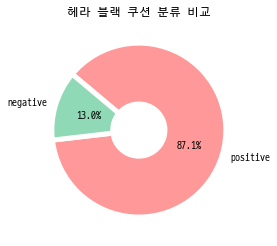

In [15]:
font_path = "/Users/kim-yuna/Library/Fonts (Removed)/04-22-2020 23_14_08 GMT+9/D2Coding-Ver1.3.2-20180524.ttf"
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family=font_name)


ratio = [len(positive_data['hera']),len(negative_data['hera']) ]
labels = ['positive', 'negative']
colors = ['#ff9999',  '#8fd9b6']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
plt.title('헤라 블랙 쿠션 분류 비교')
plt.pie(ratio, labels = labels, autopct='%.1f%%', startangle=500, counterclock=False, colors=colors, wedgeprops=wedgeprops)


## 닥터지 마일드 선크림 긍정 부정 분류 비교

([<matplotlib.patches.Wedge at 0x7f98f3c81f40>,
 [Text(1.0057571310549882, -0.445480182872414, 'positive'),
  Text(-1.0057571414822044, 0.44548015933096885, 'negative')],
 [Text(0.5485947987572662, -0.24298919065768032, '91.0%'),
  Text(-0.5485948044448387, 0.24298917781689208, '9.0%')])

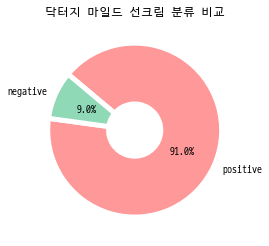

In [5]:

ratio = [len(positive_data['doctorG']),len(negative_data['doctorG']) ]
plt.title('닥터지 마일드 선크림 분류 비교')
plt.pie(ratio, labels = labels, autopct='%.1f%%', startangle=500, counterclock=False, colors=colors, wedgeprops=wedgeprops)


## 삼성 갤럭시 버즈 긍정 부정 분류 비교

([<matplotlib.patches.Wedge at 0x7f98f3d55df0>,
 [Text(1.0706291324910484, -0.25249408044836436, 'positive'),
  Text(-1.0706291561312458, 0.25249398020882896, 'negative')],
 [Text(0.5839795268132991, -0.137724043880926, '85.1%'),
  Text(-0.5839795397079522, 0.1377239892048158, '14.8%')])

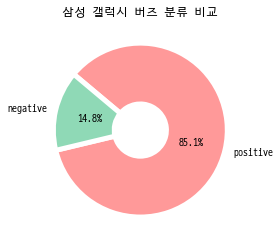

In [6]:

ratio = [len(positive_data['buds']),len(negative_data['buds']) ]
plt.title('삼성 갤럭시 버즈 분류 비교')
plt.pie(ratio, labels = labels, autopct='%.1f%%', startangle=500, counterclock=False, colors=colors, wedgeprops=wedgeprops)


## Graph Ranking 알고리즘 사용하여 단어 추출 (HITS Algorithm)

In [7]:
from krwordrank.sentence import summarize_with_sentences
from krwordrank.word import summarize_with_keywords
from konlpy.tag import *
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt

min_count = 5
max_length = 10
wordrank_extractor = KRWordRank(min_count, max_length)

def keyword_extraction(stop,texts):
    beta = 0.85    # PageRank의 decaying factor beta
    max_iter = 10
    keywords = summarize_with_keywords(texts, min_count=min_count, max_length=max_length,
    beta=0.85, max_iter=10, stopwords=stopwords, verbose=True)
    for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
        print('%8s:\t%.4f' % (word, r))
        
    return keywords


## 헤라 블랙 쿠션 긍정 데이터 분석

헤라 블랙 쿠션 긍정 데이터 분석
scan vocabs ... 
num vocabs = 4395
done = 10 Early stopped.
     리뉴얼:	16.1948
     마스크:	12.0032
      커버:	9.8397
      피부:	8.3105
     밀착력:	7.0872
      바로:	6.0683
      제품:	5.4096
      조금:	5.3995
      묻어:	5.3202
      아직:	5.0770
      아주:	5.0192
     케이스:	4.9878
      얇게:	4.7820
     지속력:	4.5988
      배송:	4.2888
      색상:	4.2606
      21:	4.2459
      살짝:	3.4978
      매트:	3.4691
      써보:	3.4023
      구성:	3.1230
      한번:	3.0705
      건조:	3.0591
      주문:	3.0219
      있어:	2.9189
     라이브:	2.8533
      들어:	2.4563
      밝은:	2.4555
      퍼프:	2.3506
      기초:	2.2572


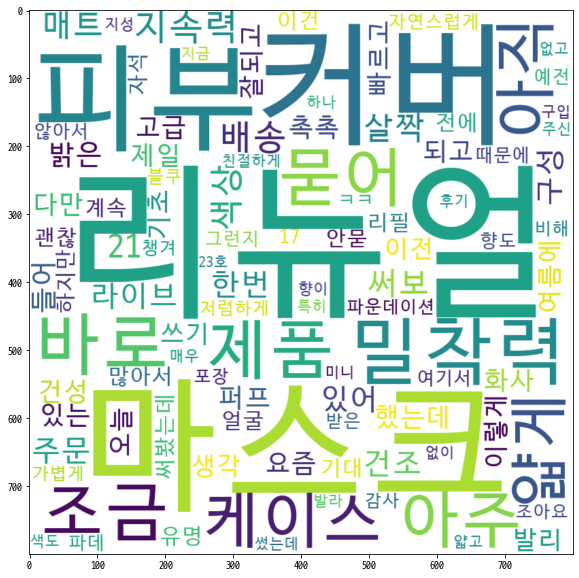

In [16]:

stopwords = {'많은','근데','고민','있었는데','그래도','하고','좋다','좋았','오래','쓰는','같이','ㅠㅠ','바르','제가','평소','우선','워낙','항상','보고','믿고','다시','원래','좋은','샀는데','않고','쓰던','화장','마음에','맘에','거의','샘플','저는','완전','역시','엄청','그리고','쓰고','같아','약간','훨씬','쓰다가','좋네요','느낌','너무','사용','확실히','다른','일단','ㅎㅎ','새로','쿠션','헤라','블랙','많이','진짜','정말','좋고','해서','기존','이번에','사은품','좋아','만족','구매','처음'}

print('헤라 블랙 쿠션 긍정 데이터 분석')
keyword = keyword_extraction(stopwords,positive_data['hera']['제목'])


krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(keyword)
fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./wordcloud_data/헤라블랙쿠션_positive_wordcloud')

## 헤라 블랙 쿠션 부정 데이터 분석

헤라 블랙 쿠션 부정 데이터 분석
scan vocabs ... 
num vocabs = 905
done = 10
     마스크:	7.4208
     리뉴얼:	3.3028
      묻어:	3.1659
      피부:	2.2694
      제품:	2.2518
      그냥:	2.0054
      커버:	1.9561
     그래서:	1.7911
      얇게:	1.7142
     바르고:	1.5918
      색상:	1.5695
     그런지:	1.5553
      주문:	1.5521
     밀착력:	1.5100
      안묻:	1.4517
      배송:	1.3887
      조금:	1.3680
     두껍게:	1.3331
     이렇게:	1.3189
      건조:	1.3039
      같은:	1.2980
     21호:	1.2928
      시간:	1.2419
      써도:	1.2379
     했는데:	1.2292
      리필:	1.2247
     하지만:	1.2043
     케이스:	1.1911
      상품:	1.1577
     쓰는데:	1.1479


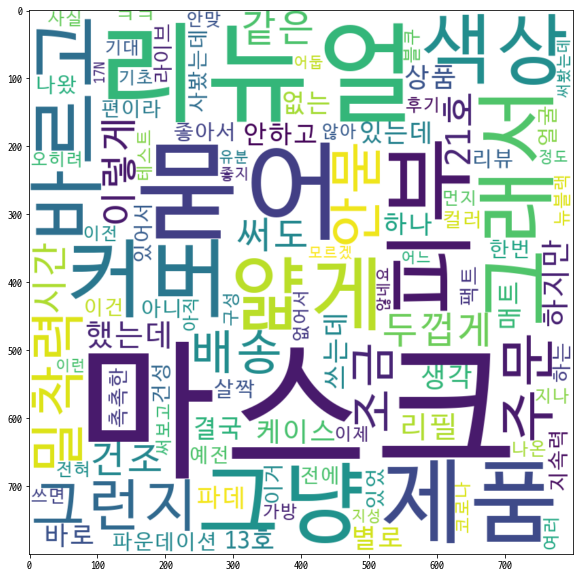

In [17]:
stopwords = {'많은','근데','고민','있었는데','그래도','하고','좋다','좋았','오래','쓰는','같이','ㅠㅠ','바르','제가','평소','우선','워낙','항상','보고','믿고','다시','원래','좋은','샀는데','않고','쓰던','화장','마음에','맘에','거의','샘플','저는','완전','역시','엄청','그리고','쓰고','같아','약간','훨씬','쓰다가','좋네요','느낌','너무','사용','확실히','다른','일단','ㅎㅎ','새로','쿠션','헤라','블랙','많이','진짜','정말','좋고','해서','기존','이번에','사은품','좋아','만족','구매','처음'}

print('헤라 블랙 쿠션 부정 데이터 분석')

keyword = keyword_extraction(stopwords,negative_data['hera']['제목'])


krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)


krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(keyword)
fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./wordcloud_data/헤라블랙쿠션_negative_wordcloud')

## 닥터지 마일드 선크림 긍정 데이터 분석

닥터지 마일드 선크림 긍정 데이터 분석
scan vocabs ... 
num vocabs = 2093
done = 10
      백탁:	6.3285
      배송:	5.4336
     발림성:	4.7834
      피부:	4.5408
    저렴하게:	4.4167
     썬크림:	4.2619
     순하고:	3.7015
      없고:	3.6648
      아주:	3.5344
    부드럽게:	3.4188
      아직:	3.3475
      촉촉:	3.3351
    무기자차:	3.2773
     없어서:	3.1168
      계속:	3.0438
     빠르고:	3.0014
    좋습니다:	2.8492
     않아서:	2.7589
     같아요:	2.7341
     순해서:	2.5566
     트러블:	2.4780
     이것만:	2.4412
     적당히:	2.4257
      건조:	2.3865
      최고:	2.2738
     써보고:	2.2526
     있어요:	2.2497
      조금:	2.2438
      성분:	2.1672
      있는:	2.1619


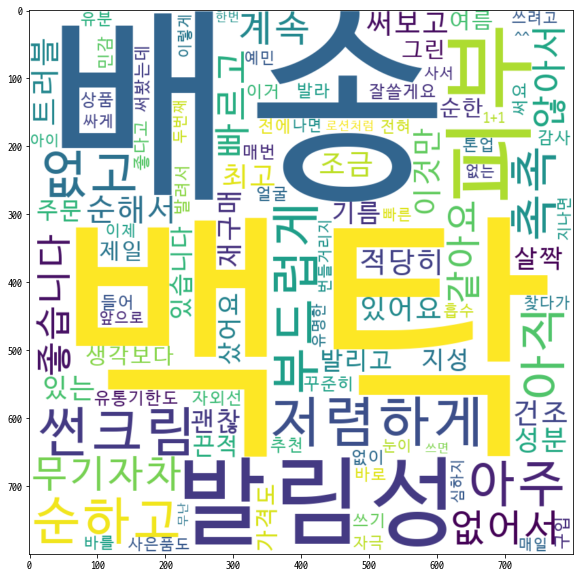

In [21]:
stopwords = {'제품','닥터지','선크림','좋아요','많은','근데','고민','있었는데','그래도','하고','좋다','좋았','오래','쓰는','같이','ㅠㅠ','바르','제가','평소','우선','워낙','항상','보고','믿고','다시','원래','좋은','샀는데','않고','쓰던','화장','마음에','맘에','거의','샘플','저는','완전','역시','엄청','그리고','쓰고','같아','약간','훨씬','쓰다가','좋네요','느낌','너무','사용','확실히','다른','일단','ㅎㅎ','새로','쿠션','헤라','블랙','많이','진짜','정말','좋고','해서','기존','이번에','사은품','좋아','만족','구매','처음'}

print('닥터지 마일드 선크림 긍정 데이터 분석')
keyword = keyword_extraction(stopwords,positive_data['doctorG']['제목'])


krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(keyword)
fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./wordcloud_data/닥터지마일드선크림_positive_wordcloud')

## 닥터지 마일드 선크림 부정 데이터 분석

닥터지 마일드 선크림 부정 데이터 분석
scan vocabs ... 
num vocabs = 328
done = 10
      백탁:	2.5008
    무기자차:	2.2098
     트러블:	1.8078
     없어요:	1.7062
      이거:	1.5705
      피부:	1.3373
     좋아서:	1.2993
     같아요:	1.2979
      배송:	1.2327
      건조:	1.1721
      발림:	1.0174
      심하:	1.0098
      성분:	0.9954
     얼굴이:	0.9785
      눈이:	0.9386
      시간:	0.9291
      순하:	0.9140
      보통:	0.8940
     주문했:	0.8542
      조금:	0.8532
     있어요:	0.8514
     자외선:	0.8328
      없는:	0.8223
      ..:	0.7325
      기름:	0.6812
      상품:	0.6721
      건성:	0.6566
      그런:	0.6305
      유분:	0.6260
      그렇:	0.6249


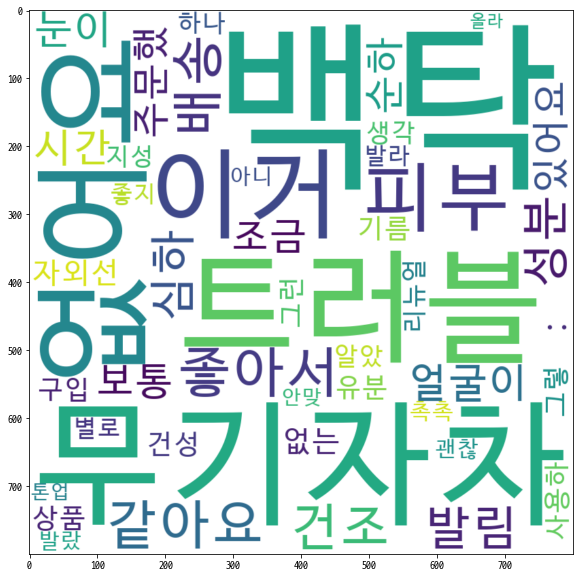

In [20]:
stopwords = {'썬크림','제품','닥터지','선크림','좋아요','많은','근데','고민','있었는데','그래도','하고','좋다','좋았','오래','쓰는','같이','ㅠㅠ','바르','제가','평소','우선','워낙','항상','보고','믿고','다시','원래','좋은','샀는데','않고','쓰던','화장','마음에','맘에','거의','샘플','저는','완전','역시','엄청','그리고','쓰고','같아','약간','훨씬','쓰다가','좋네요','느낌','너무','사용','확실히','다른','일단','ㅎㅎ','새로','쿠션','헤라','블랙','많이','진짜','정말','좋고','해서','기존','이번에','사은품','좋아','만족','구매','처음'}

print('닥터지 마일드 선크림 부정 데이터 분석')
keyword = keyword_extraction(stopwords,negative_data['doctorG']['제목'])


krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(keyword)
fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./wordcloud_data/닥터지마일드선크림_negative_wordcloud')

## 삼성 갤럭시 버즈 긍정 데이터 분석

삼성 갤럭시 버즈 긍정 데이터 분석
scan vocabs ... 
num vocabs = 2719
done = 10
      배송:	11.5060
     라이브:	7.6024
      아주:	7.1971
      음질:	6.9122
     선물로:	6.7386
      귀에:	6.7322
      귀가:	6.6985
      착용:	6.3051
     빠르고:	6.1284
     오픈형:	5.9770
     케이스:	5.5242
     이어폰:	4.9429
     노이즈:	4.7410
      바로:	4.0117
     브론즈:	3.6388
      무선:	3.4661
      가격:	3.2205
      들어:	3.1915
     이쁘고:	3.0025
    좋습니다:	2.9807
     커널형:	2.9660
     에어팟:	2.9437
      색상:	2.8622
      생각:	2.8567
      최고:	2.8147
    블루투스:	2.7472
     예쁘고:	2.6759
     디자인:	2.6442
    저렴하게:	2.6046
      조금:	2.5397


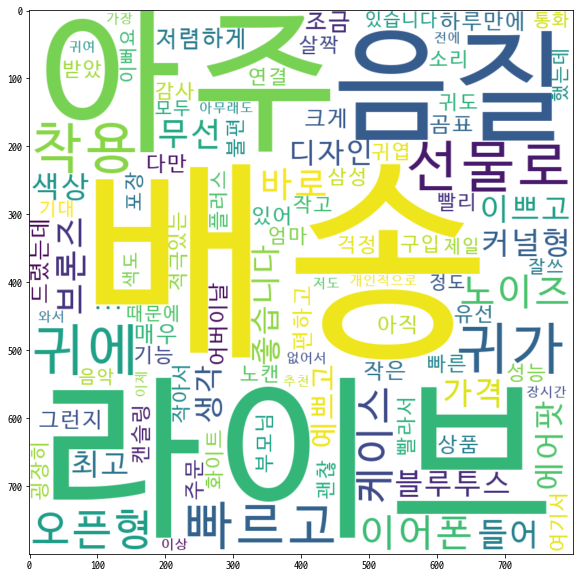

In [19]:
stopwords = {'갤럭시','버즈','제품','닥터지','선크림','좋아요','많은','근데','고민','있었는데','그래도','하고','좋다','좋았','오래','쓰는','같이','ㅠㅠ','바르','제가','평소','우선','워낙','항상','보고','믿고','다시','원래','좋은','샀는데','않고','쓰던','화장','마음에','맘에','거의','샘플','저는','완전','역시','엄청','그리고','쓰고','같아','약간','훨씬','쓰다가','좋네요','느낌','너무','사용','확실히','다른','일단','ㅎㅎ','새로','쿠션','헤라','블랙','많이','진짜','정말','좋고','해서','기존','이번에','사은품','좋아','만족','구매','처음'}

print('삼성 갤럭시 버즈 긍정 데이터 분석')
keyword = keyword_extraction(stopwords,positive_data['buds']['제목'])


krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(keyword)
fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./wordcloud_data/삼성갤럭시버즈_positive_wordcloud')

## 삼성 갤럭시 버즈 부정 데이터 분석

삼성 갤럭시 버즈 부정 데이터 분석
scan vocabs ... 
num vocabs = 698
done = 10
      귀가:	3.8218
      귀에:	3.6066
      배송:	3.5346
      착용:	3.2066
     이어폰:	2.9081
      음질:	2.8460
    생각보다:	2.5575
     노이즈:	2.4216
     오픈형:	2.1724
     라이브:	1.9316
      같은:	1.7332
      이건:	1.6859
     작아서:	1.6555
      별로:	1.5585
      있는:	1.4798
     커널형:	1.4784
     이렇게:	1.4538
      따라:	1.4400
     장시간:	1.3761
      매우:	1.3676
     캔슬링:	1.3473
      조금:	1.2698
      문제:	1.2601
     ...:	1.2250
      그냥:	1.2249
      상품:	1.2163
      어제:	1.1975
      작은:	1.1951
      주로:	1.1857
     에어팟:	1.1847


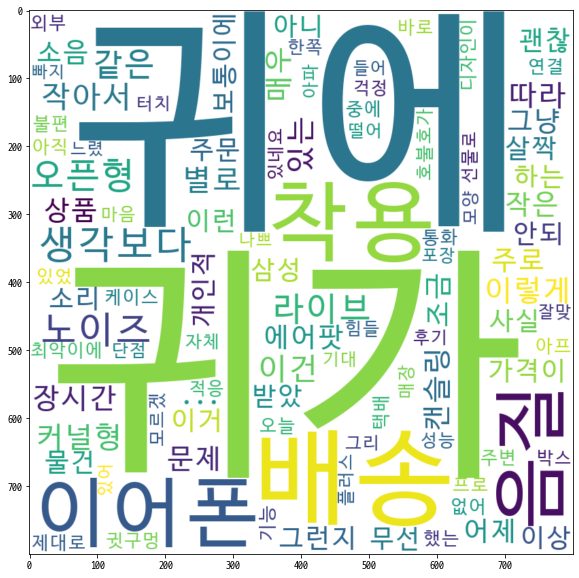

In [18]:
stopwords = {'갤럭시','버즈','제품','닥터지','선크림','좋아요','많은','근데','고민','있었는데','그래도','하고','좋다','좋았','오래','쓰는','같이','ㅠㅠ','바르','제가','평소','우선','워낙','항상','보고','믿고','다시','원래','좋은','샀는데','않고','쓰던','화장','마음에','맘에','거의','샘플','저는','완전','역시','엄청','그리고','쓰고','같아','약간','훨씬','쓰다가','좋네요','느낌','너무','사용','확실히','다른','일단','ㅎㅎ','새로','쿠션','헤라','블랙','많이','진짜','정말','좋고','해서','기존','이번에','사은품','좋아','만족','구매','처음'}

print('삼성 갤럭시 버즈 부정 데이터 분석')
keyword = keyword_extraction(stopwords,negative_data['buds']['제목'])


krwordrank_cloud = WordCloud(
    font_path = font_path,
    width = 800,
    height = 800,
    background_color="white"
)

krwordrank_cloud = krwordrank_cloud.generate_from_frequencies(keyword)
fig = plt.figure(figsize=(10, 10))
plt.imshow(krwordrank_cloud, interpolation="bilinear")
plt.show()
fig.savefig('./wordcloud_data/삼성갤럭시버즈_negative_wordcloud')